# Qiskit Tutorial
---

This notebook follows the tutorial provided by [PythonProgramming.net](https://pythonprogramming.net/quantum-computer-programming-tutorial/) to teach quantum computing using IBM's quantum library Qiskit.

According to [Qiskit's documentation](https://qiskit.org/documentation/getting_started.html), the suggested workflow for quantum development follows:

1. **Build -** design a quantum circuit that represents the problem you are considering.
2. **Execute -** run experiments on different backends (which include both systems and simulators).
3. **Analyze -** calculate summary statistics and visualize the results of experiments.

The recommended workflow will be modeled by this notebook as a proof of concept.

---

## <a name="TOC"></a> Table of Contents
1. [Design Circuit](#design)
2. [Execute Circuit Design](#execute)
3. [Analyze Experimental Results](#analyze)
4. [Simulate Quantum Circuit](#simulate)



In [1]:
# -------------------- CONFIGURE ENVIRONMENT -------------------- #

%reset -f

# Import standard libraries
import numpy as np
import matplotlib as plt
%matplotlib inline

# Import quantum library
import qiskit as q


### <a name="design"></a> [Design Circuit](#TOC)

All quantum models in Qiskit are essentially quantum circuits which are fed to a simulator to be analyzed. Consequently, the quantum code is inherently low-level as for now, as it operates on individual quantum gates and cannot perform the high-level abstractions of contemporary conventional computer languages.

The quantum model developed below demonstrates the concept of quantum entanglement. The controled not (CNOT) gate used between the two quantum inputs impose a quantum entanglement between the two inputs. This quantum entanglement ensures that if the state of one qubit is known then the state of its entangled qubit can also be known. The truth table is given below.

<table style="width:40%">
  <tr>
    <th>Control</th>
    <th>Target</th>
    <th>Out 0</th>
    <th>Out 1</th>
  </tr>
  <tr>
    <td>|0〉</td>
    <td>|0〉</td>
    <td>|0〉</td>
    <td>|0〉</td>
  </tr>
  <tr>
    <td>|0〉</td>
    <td>|1〉</td>
    <td>|0〉</td>
    <td>|1〉</td>
  </tr>
  <tr>
    <td>|1〉</td>
    <td>|0〉</td>
    <td>|1〉</td>
    <td>|1〉</td>
  </tr>
  <tr>
    <td>|1〉</td>
    <td>|1〉</td>
    <td>|1〉</td>
    <td>|0〉</td>
  </tr>
</table>





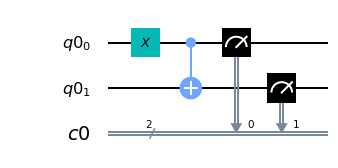

In [2]:
# -------------------- DESIGN CIRCUIT -------------------- #

# Create registers
qubits = q.QuantumRegister(2)
classical = q.ClassicalRegister(2)

# Initialize quantum circuit
#   The quantum circuit takes both q-bits and conventional bits into its operational
#   matrix. The resulting circuit can be programmed by calling gates to append them
#   to the model.
circuit = q.QuantumCircuit(qubits,classical)

# Add not gate to the first qubit
circuit.x(qubit=0)

# Add a controlled not gate which flips the target qubit if the control qubit is true
#   This quantum logic gate is responsible for entangling these two qubits. By linking
#   their logic values, they become inter-related in a way that classical bits cannot
#   be related.
circuit.cx(control_qubit=0, target_qubit=1)

# Measure the qubits to classical bits
#   !!! I have not found a good explanation for what this function does. I can only
#   assume that it collapses the qubits into conventional bits so that they are no
#   longer in superposition and can therefore be read as output.
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1

# Visualize the quantum circuit
circuit.draw(output="mpl")


### <a name="execute"></a> [Execute Circuit Design](#TOC)

With the circuit designed, we can now simulate it using IBM's quantum computer which is available to us for free. Thank you IBM.

In order to gain access to the simulator, an account must be created at [https://quantum-computing.ibm.com/](https://quantum-computing.ibm.com/). Under the account page, there is a section for the management of tokens, copy the token into a text file and read it back into the program in order to establish a valid connection with IBM. This must only be done once for the life of the token as it saves the token information locally to the computer.



In [3]:
# -------------------- EXECUTE CIRCUIT -------------------- #

# Read token and exchange account information
token = open('token.txt', 'r').read()
q.IBMQ.save_account(token, overwrite=True)

# Load account connection
q.IBMQ.load_account()

# To see a list of providers, execute the following:
# q.IBMQ.providers()

# Set provider
provider = q.IBMQ.get_provider("ibm-q")

# Check the status of all IBM quantum systems
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")


ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 3 queued and 5 qubits
ibmq_16_melbourne has 15 queued and 15 qubits
ibmq_vigo has 6 queued and 5 qubits
ibmq_ourense has 29 queued and 5 qubits
ibmq_london has 1 queued and 5 qubits
ibmq_burlington has 4 queued and 5 qubits
ibmq_essex has 7 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_rome has 13 queued and 5 qubits


Some IBM quantum locations are in greater demand than others and some have varying capabilities with respect to the total number of qubits that their systems can support. Once the provider has been selected, a provider object can be instantiated and fed to the execute function for processing.



In [4]:
# Select provider
backend = provider.get_backend("ibmq_16_melbourne")

# Instantiate the job and execute
job = q.execute(circuit, backend=backend, shots=500)

# Monitor the job status
q.tools.monitor.job_monitor(job)


Job Status: job has successfully run


The job status monitor will convey the status of the job in real time. Running from `job is being validated` to `job is actively running` and finally to `job has successfully run`.



### <a name="analyze"></a> [Analyze Experimental Results](#TOC)

Now that the job has executed itself, we can parse the results and visualize the probability expectations.



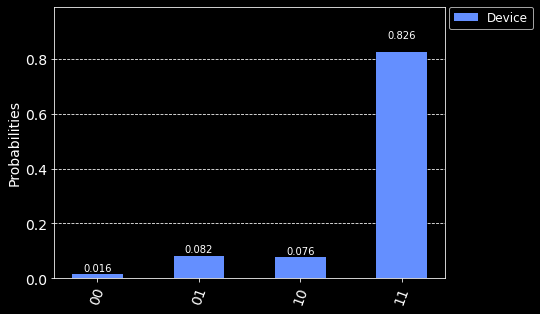

In [5]:
# -------------------- EXPERIMENTAL ANALYSIS -------------------- #

# Select plotting style
plt.style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.

# Stash results from job
result = job.result()

# Pull the histogram data from the experiment
counts = result.get_counts(circuit)

# Plot the expectation from histogram data
q.visualization.plot_histogram([counts], legend=['Device'])


The expected value of this experiment is `11`. The remaining outputs are simply statistical noise. Remember: quantum machines do not model probability, they are probability. Consequently, this experiment, while repeatable, will not yield the exact same results after each run time.

### <a name="simulate"></a> [Simulate Quantum Circuit](#TOC)

Running quantum circuit designs on a real quantum computer, while possible, is not recommended because the resources are scarce and it is not necessary to use time on the quantum machines when the circuit can be simulated instead. Using the simulator, the noise will be significantly reduced and might even return nearly perfect results when compared to the quantum jobs. There are three simulators at the time of writing this notebook:

**Qasm -** runs multi-shot ideal and noisy simulations and returns either counts or memory
<br>
**Statevector -** runs single-shot ideal simulations and returns simulation state-vector
<br>
**Unitary -** runs single-shot ideal simulations and returns the unitary matrix for the circuit.



In [6]:
# -------------------- CIRCUIT SIMULATION -------------------- #

# Instantiate Aer simulator
sim_backend = q.Aer.get_backend('qasm_simulator')

# Run simulation job
job = q.execute(circuit, backend=sim_backend, shots=500)
q.tools.monitor.job_monitor(job)


Job Status: job has successfully run


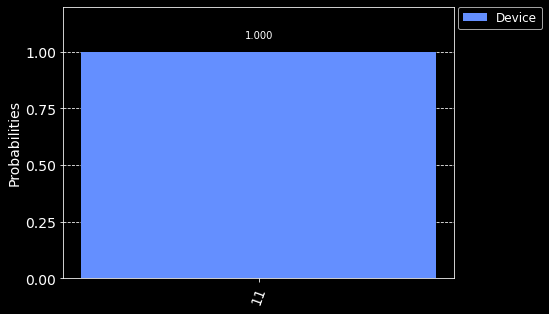

In [7]:
# Stash result sets
result = job.result()
counts = result.get_counts(circuit)

# Visualize simulation results
q.visualization.plot_histogram([counts], legend=['Device'])


Obviously, this histogram reflects the ideal simulator output and therefore the histogram contains no noise to interfere with the circuit's operation.

*Written by Alice Seaborn, June 1 2020*